In [1]:
from src.Distributions import *
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FormatStrFormatter, ScalarFormatter, LogLocator, LogFormatterSciNotation
import matplotlib.lines as mlines
from IPython.display import clear_output
plt.style.use('properties.mplstyle')

In [2]:
N = 10**5
# Generate .npy with all degree and distances values from gml.gz files
degree_file(N)
distance_file(N)
clear_output()

In [ ]:
alpha_ag_f = 2.0
alpha_g_v = [i for i in np.arange(1.0, 10.0, 0.5)]
alpha_a_v = [i for i in np.arange(2.0, 10.0, 0.5)]
dim = [1,2,3,4]
# Generate .npy with all degree values from gml.gz files
bin_count = 80
for d in dim:
    for aa in alpha_a_v:
        # Generate log_binning file to distances and degree
        print(f"N = {N}, dim = {d}, alpha_a = {aa}, alpha_g = {alpha_ag_f}")
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{aa:.2f}_alpha_g_{alpha_ag_f:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_ag_f, propertie="distances")
        
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{aa:.2f}_alpha_g_{alpha_ag_f:.2f}/degree.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_ag_f, propertie="degree")

        # Generate linear binning to degree
        distribution(dados_flat, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_ag_f, propertie="degree")
    
    print("-----------------")
    for ag in alpha_g_v:
        # Generate log_binning file to distances and degree
        print(f"N = {N}, dim = {d}, alpha_a = {alpha_ag_f}, alpha_g = {ag}")
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{ag:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=alpha_ag_f, alpha_g=ag, propertie="distances")
        
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{ag:.2f}/degree.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=alpha_ag_f, alpha_g=ag, propertie="degree")

        # Generate linear binning to degree
        distribution(dados_flat, save=True, N=N, dim=d, alpha_a=alpha_ag_f, alpha_g=ag, propertie="degree")

N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/degree_distribution_linear.csv
N = 100000, dim = 1, alpha_a = 2.5, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.50_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.50_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.50_alpha_g_2.00/degree_distribution_linear.csv
N = 100000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_3.00_alpha_g_2.00/distances_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_3.00_alpha_g_2.00/degree_distribution_log.csv
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_3.00_alp

In [ ]:
import numpy as np
import pandas as pd
import json
import os

N = 10**5
dim = [1, 2, 3, 4]
alpha_ag_f = 2.0
alpha_g_v = np.arange(1.0, 10, 0.5)
alpha_a_v = np.arange(2.0, 10, 0.5)


def distances_distribution(N, dim, alpha_a_v, alpha_g_v):
    alpha_ag_f = 2.0
    data = []
    
    for d in dim:
        # Loop variando alpha_g
        for alpha_g in alpha_g_v:
            folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g:.2f}"
            try:
                df = pd.read_csv(os.path.join(folder, "distances_distribution_log.csv"), delimiter=' ')
                dados = np.load(os.path.join(folder, "distances.npy"))
            except Exception as e:
                print(f"Erro ao ler {folder}: {e}")
                continue

            N_s = int(dados.size / N)

            entry = {
                "N": N,
                "alpha_A": format(alpha_ag_f, '.2f'),
                "alpha_G": format(alpha_g, '.2f'),
                "dim": d,
                "N_s": N_s,
                "k": df["ds"].tolist(),
                "Pk": df["pds"].tolist()
            }
            data.append(entry)

        # Loop variando alpha_a
        for alpha_a in alpha_a_v:
            folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_ag_f:.2f}"
            try:
                df = pd.read_csv(os.path.join(folder, "distances_distribution_log.csv"), delimiter=' ')
                dados = np.load(os.path.join(folder, "distances.npy"))
            except Exception as e:
                print(f"Erro ao ler {folder}: {e}")
                continue

            N_s = int(dados.size / N)

            entry = {
                "N": N,
                "alpha_A": format(alpha_a,'.2f'),
                "alpha_G": format(alpha_ag_f,'.2f'),
                "dim": d,
                "N_s": N_s,
                "k": df["ds"].tolist(),
                "Pk": df["pds"].tolist()
            }
            data.append(entry)

    # Salvar como JSON
    with open('../../data/distances_distributions.json', 'w') as f:
        json.dump(data, f, indent=4)

    print("Arquivo salvo como 'distances_distributions.json'")
distances_distribution(N, dim, alpha_a_v, alpha_g_v)

In [20]:
alpha_ag_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0]
alpha_a_v = [0.0, 1.0, 2.0, 4.0, 6.0, 8.0]
dim = [1,2,3,4]

k_1d_g, pk_1d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g, pk_2d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g, pk_3d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g, pk_4d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a, pk_1d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a, pk_2d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a, pk_3d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a, pk_4d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [21]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_linear.csv", delimiter=' ')
    
    k_1d_g[i], pk_1d_g[i] = df_1d["k"], df_1d["pk"]
    k_2d_g[i], pk_2d_g[i] = df_2d["k"], df_2d["pk"]
    k_3d_g[i], pk_3d_g[i] = df_3d["k"], df_3d["pk"]
    k_4d_g[i], pk_4d_g[i] = df_4d["k"], df_4d["pk"]

for i in range(len(alpha_a_v)):
        df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_linear.csv", delimiter=' ')
        df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_linear.csv", delimiter=' ')

        k_1d_a[i], pk_1d_a[i] = df_1d["k"], df_1d["pk"]
        k_2d_a[i], pk_2d_a[i] = df_2d["k"], df_2d["pk"]
        k_3d_a[i], pk_3d_a[i] = df_3d["k"], df_3d["pk"]
        k_4d_a[i], pk_4d_a[i] = df_4d["k"], df_4d["pk"]

In [22]:
k_1d_g_log, pk_1d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g_log, pk_2d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g_log, pk_3d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g_log, pk_4d_g_log = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a_log, pk_1d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a_log, pk_2d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a_log, pk_3d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a_log, pk_4d_a_log = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [23]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/degree_distribution_log.csv", delimiter=' ')
    
    k_1d_g_log[i], pk_1d_g_log[i] = df_1d["k"], df_1d["pk"]
    k_2d_g_log[i], pk_2d_g_log[i] = df_2d["k"], df_2d["pk"]
    k_3d_g_log[i], pk_3d_g_log[i] = df_3d["k"], df_3d["pk"]
    k_4d_g_log[i], pk_4d_g_log[i] = df_4d["k"], df_4d["pk"]

for i in range(len(alpha_a_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/degree_distribution_log.csv", delimiter=' ')
    
    k_1d_a_log[i], pk_1d_a_log[i] = df_1d["k"], df_1d["pk"]
    k_2d_a_log[i], pk_2d_a_log[i] = df_2d["k"], df_2d["pk"]
    k_3d_a_log[i], pk_3d_a_log[i] = df_3d["k"], df_3d["pk"]
    k_4d_a_log[i], pk_4d_a_log[i] = df_4d["k"], df_4d["pk"]


In [24]:
q_1d, err_1d_q, b_1d, err_1d_b = combine_estimates_from_datasets(k_1d_g, pk_1d_g, dim = 1)
q_2d, err_2d_q ,b_2d, err_2d_b = combine_estimates_from_datasets(k_2d_g, pk_2d_g, dim = 2)
q_3d, err_3d_q, b_3d, err_3d_b = combine_estimates_from_datasets(k_3d_g, pk_3d_g, dim = 3)
q_4d, err_4d_q, b_4d, err_4d_b = combine_estimates_from_datasets(k_4d_g, pk_4d_g, dim = 4)

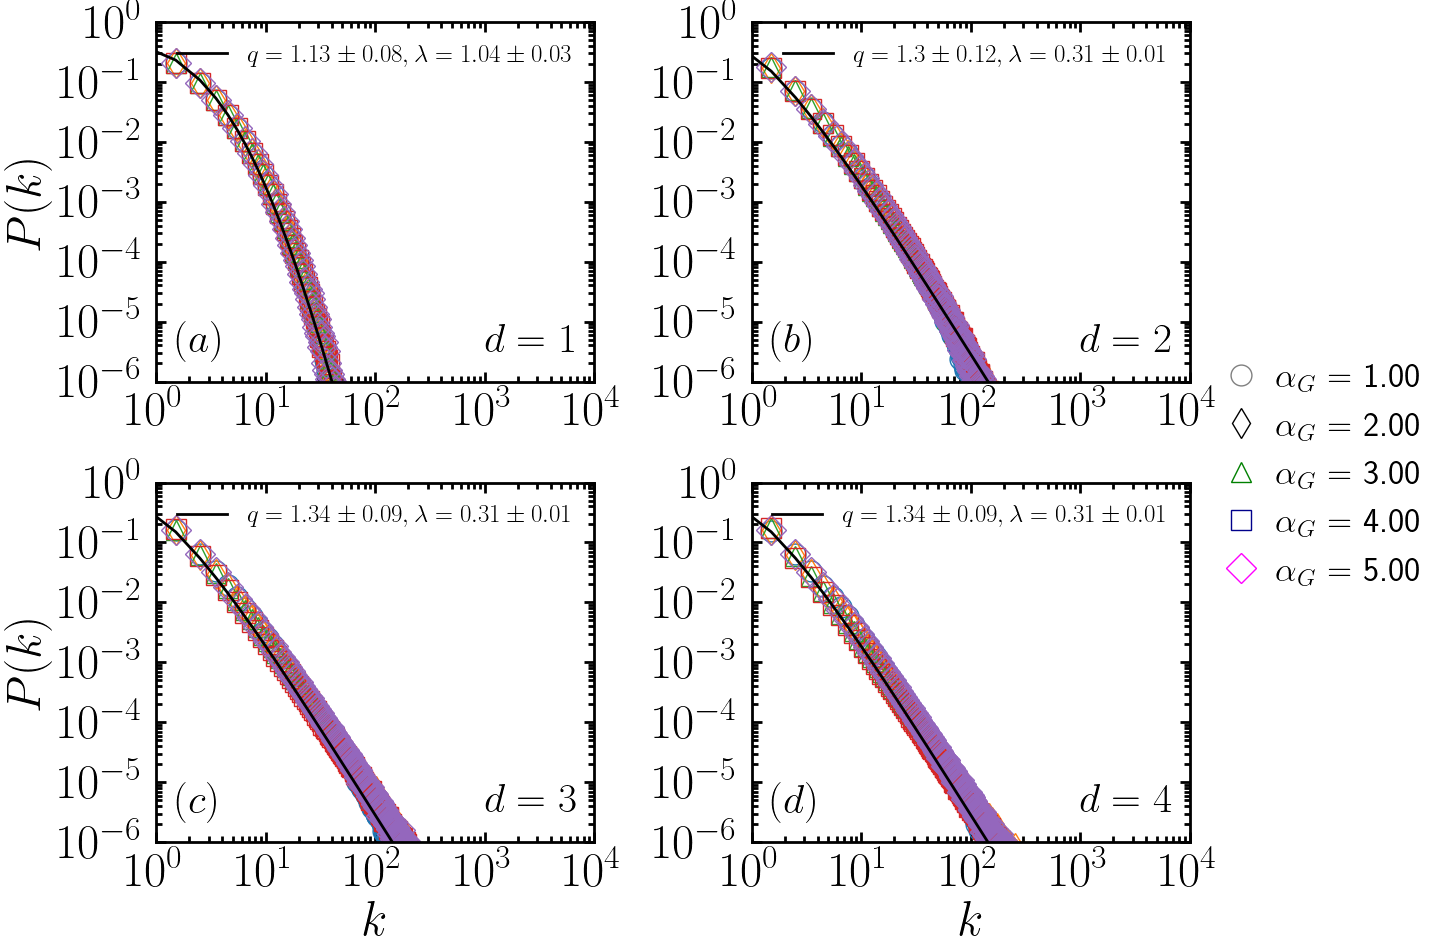

In [25]:


color = ["#808080", "black", '#008000', "#00008B", "magenta", "darkgoldenrod"]
labels_1 = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]
markers = ["o", "d", "^", "s", "D"]
dim = [1, 2, 3, 4]
titles = [f"$d = {d}$" for d in dim]
labels_global = [rf"$\alpha_G$ = {alpha_g_v[i]:.2f}" for i in range(len(alpha_g_v))]
markersize = 15

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotando dados empíricos
for i in range(len(alpha_g_v)):
    ax[0, 0].plot(k_1d_g[i], pk_1d_g[i], markers[i], markersize = markersize, mew=1.0)
    ax[0, 1].plot(k_2d_g[i], pk_2d_g[i], markers[i], markersize = markersize, mew=1.0)
    ax[1, 0].plot(k_3d_g[i], pk_3d_g[i], markers[i], markersize = markersize, mew=1.0)
    ax[1, 1].plot(k_4d_g[i], pk_4d_g[i], markers[i], markersize = markersize, mew=1.0)

# --- Apenas curvas teóricas ajustadas (sem banda) ---
label_1d = f'$q =  {q_1d:.2f} \\pm {err_1d_q:.2f}, \\lambda = {b_1d:.2f} \\pm {err_1d_b:.2f}$'
label_2d = f'$q = {q_2d:.1f} \\pm {err_2d_q:.2f}, \\lambda = {b_2d:.2f} \\pm {err_2d_b:.2f}$'
label_3d = f'$q = {q_3d:.2f} \\pm {err_3d_q:.2f}, \\lambda = {b_3d:.2f} \\pm {err_3d_b:.2f}$'
label_4d = f'$q = {q_4d:.2f} \\pm {err_4d_q:.2f}, \\lambda = {b_4d:.2f} \\pm {err_4d_b:.2f}$'

thickness_axes = 2.0

ax[0, 0].plot(k_1d_g[1], q_exp(k_1d_g[1], q_1d, b_1d), label=label_1d, color="k", linewidth=thickness_axes)
ax[0, 1].plot(k_2d_g[1], q_exp(k_2d_g[1], q_2d, b_2d), label=label_2d, color="k", linewidth=thickness_axes)
ax[1, 0].plot(k_3d_g[1], q_exp(k_3d_g[1], q_3d, b_3d), label=label_3d, color="k", linewidth=thickness_axes)
ax[1, 1].plot(k_4d_g[1], q_exp(k_4d_g[1], q_4d, b_4d), label=label_4d, color="k", linewidth=thickness_axes)

# Subfigure labels
ax[0, 0].text(1.5, 10**(-5.5), "$(a)$", style="normal", fontsize=30)
ax[0, 1].text(1.5, 10**(-5.5), "$(b)$", style="normal", fontsize=30)
ax[1, 0].text(1.5, 10**(-5.5), "$(c)$", style="normal", fontsize=30)
ax[1, 1].text(1.5, 10**(-5.5), "$(d)$", style="normal", fontsize=30)

ax[0, 0].text(10**(3.0), 10**(-5.5), "$d = 1$", style="normal", fontsize=30)
ax[0, 1].text(10**(3.0), 10**(-5.5), "$d = 2$", style="normal", fontsize=30)
ax[1, 0].text(10**(3.0), 10**(-5.5), "$d = 3$", style="normal", fontsize=30)
ax[1, 1].text(10**(3.0), 10**(-5.5), "$d = 4$", style="normal", fontsize=30)

# Legenda global
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None',
                            markersize=markersize, markerfacecolor='none', mew=1.0) for i in range(len(alpha_g_v))]
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.80, 0.5), handletextpad=.001,
           fontsize=25, frameon=False)


# Ajustes de escala e estilo
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1, 10**4])
        ax[i, j].set_ylim([10**(-6), 1])
        #ax[i, j].set_title(titles[i*2+j], fontsize=20)
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":18}, fancybox=True, framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$", size=35)
        ax[1, j].set_xlabel(r"$k$", size=35)
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=7, width=thickness_axes, colors='black')
        ax[i, j].tick_params(axis='both', which='minor', direction='in', length=4, width=thickness_axes, colors='black')
        ax[i, j].tick_params('both', labelsize=35)
        for spine in ax[i, j].spines.values():
            spine.set_linewidth(thickness_axes)
        ax[i, j].xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
        ax[i, j].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        
        # Subticks automáticos entre potências de 10
        ax[i, j].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
        ax[i, j].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))

        # Formatação dos ticks como 10⁰, 10¹, ...
        ax[i, j].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
        ax[i, j].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/degree_alpha_g.png", dpi=300)
plt.show()

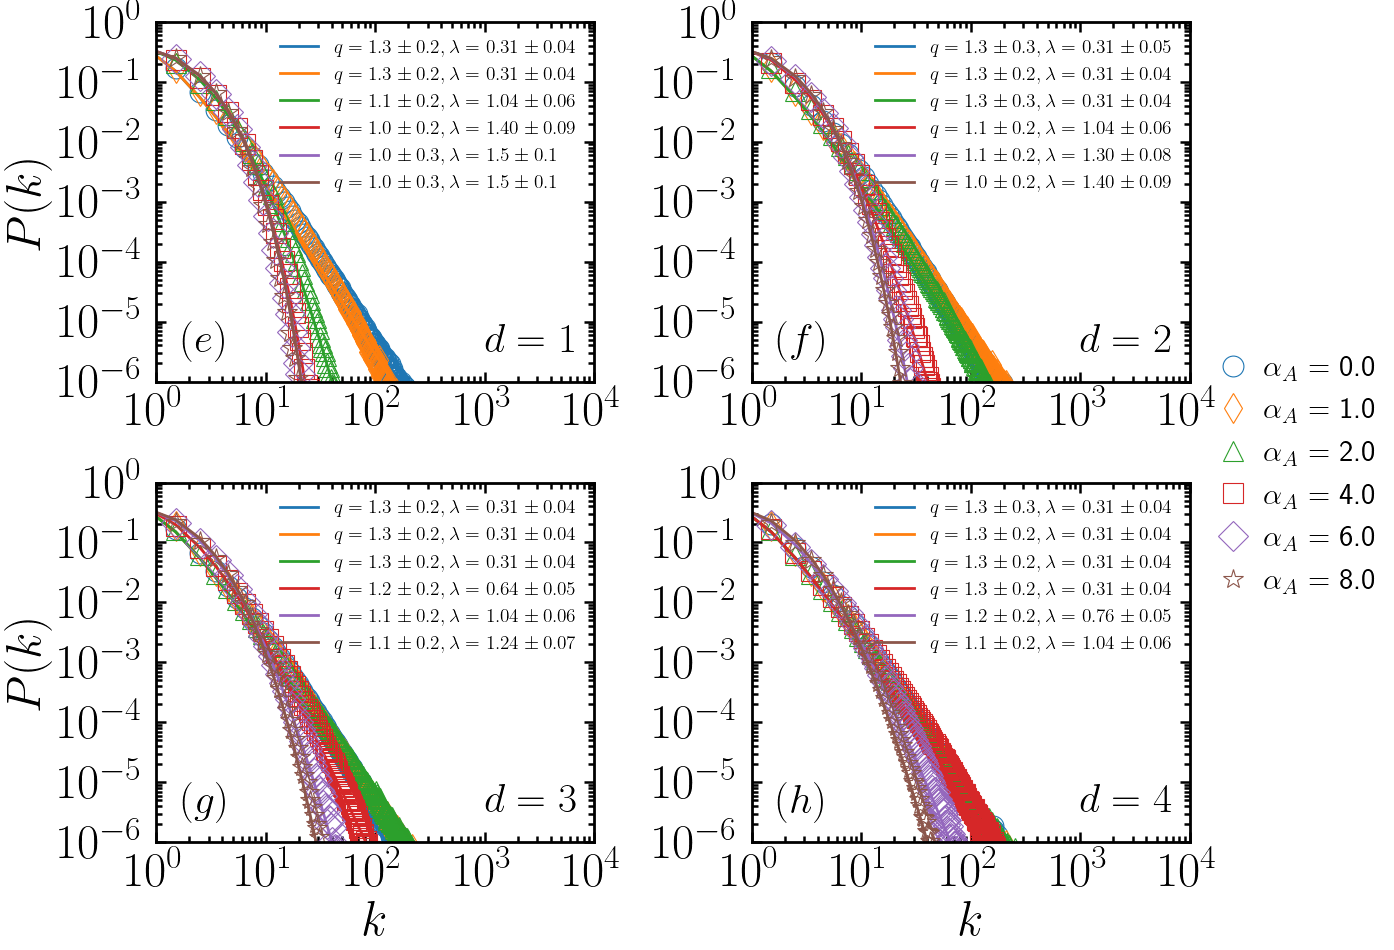

In [28]:
Q_1d, B_1d = [], []
Q_2d, B_2d = [], []
Q_3d, B_3d = [], []
Q_4d, B_4d = [], []
legend_1d_alpha_a = []
legend_2d_alpha_a = []
legend_3d_alpha_a = []
legend_4d_alpha_a = []
for i in range(len(alpha_a_v)):
    fitted_q_1d, fitted_b_1d, perr_q_1d, perr_b_1d = optimize_q_exp(k_1d_a_log[i], pk_1d_a_log[i], q_initial=q(alpha_a_v[i], 1), b_initial=eta(alpha_a_v[i], 1), delta_q=0.01, delta_b=0.01)
    fitted_q_2d, fitted_b_2d, perr_q_2d, perr_b_2d = optimize_q_exp(k_2d_a_log[i], pk_2d_a_log[i], q_initial=q(alpha_a_v[i], 2), b_initial=eta(alpha_a_v[i], 2), delta_q=0.01, delta_b=0.01)
    fitted_q_3d, fitted_b_3d, perr_q_3d, perr_b_3d = optimize_q_exp(k_3d_a_log[i], pk_3d_a_log[i], q_initial=q(alpha_a_v[i], 3), b_initial=eta(alpha_a_v[i], 3), delta_q=0.01, delta_b=0.01)
    fitted_q_4d, fitted_b_4d, perr_q_4d, perr_b_4d = optimize_q_exp(k_4d_a_log[i], pk_4d_a_log[i], q_initial=q(alpha_a_v[i], 4), b_initial=eta(alpha_a_v[i], 4), delta_q=0.01, delta_b=0.01)

    Q_1d.append(float(fitted_q_1d))
    Q_2d.append(float(fitted_q_2d))
    Q_3d.append(float(fitted_q_3d))
    Q_4d.append(float(fitted_q_4d))
    
    B_1d.append(float(fitted_b_1d))
    B_2d.append(float(fitted_b_2d))
    B_3d.append(float(fitted_b_3d))
    B_4d.append(float(fitted_b_4d))
    
    q_1d_l, b_1d_l = "$q = " + round_measurement(fitted_q_1d, perr_q_1d)," ,\\lambda = " + round_measurement(fitted_b_1d, perr_b_1d) + " $"
    q_2d_l, b_2d_l = "$q = " +  round_measurement(fitted_q_2d, perr_q_2d)," ,\\lambda = " +  round_measurement(fitted_b_2d, perr_b_2d) + " $"
    q_3d_l, b_3d_l = "$q = " +  round_measurement(fitted_q_3d, perr_q_3d)," ,\\lambda = " +  round_measurement(fitted_b_3d, perr_b_3d) + " $"
    q_4d_l, b_4d_l = "$q = " +  round_measurement(fitted_q_4d, perr_q_4d)," ,\\lambda = " +  round_measurement(fitted_b_4d, perr_b_4d) + " $"
    
    legend_1d_alpha_a.append(q_1d_l + b_1d_l)
    legend_2d_alpha_a.append(q_2d_l + b_2d_l)
    legend_3d_alpha_a.append(q_3d_l + b_3d_l)
    legend_4d_alpha_a.append(q_4d_l + b_4d_l)
markers = ["o","d","^","s","D","*","H","p","P"]

labels_global = [rf"$\alpha_A$ = {alpha_a_v[i]:.1f}" for i in range(len(alpha_a_v))]
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markersize = 15
fig, ax = plt.subplots(2, 2,figsize=(15,10))

thickness_axes = 2.0

#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_a_v)):    
    # Plot data
    ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i], markersize = markersize)
    ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i], markersize = markersize)
    ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i], markersize = markersize)
    ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i], markersize = markersize)
    
    # ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    
    ax[0, 0].plot(k_1d_a[i], q_exp(k_1d_a[i], Q_1d[i], B_1d[i]), color=color[i],label=legend_1d_alpha_a[i], linewidth=thickness_axes)
    ax[0, 1].plot(k_2d_a[i], q_exp(k_2d_a[i], Q_2d[i], B_2d[i]), color=color[i],label=legend_2d_alpha_a[i], linewidth=thickness_axes)
    ax[1, 0].plot(k_3d_a[i], q_exp(k_3d_a[i], Q_3d[i], B_3d[i]), color=color[i],label=legend_3d_alpha_a[i], linewidth=thickness_axes)
    ax[1, 1].plot(k_4d_a[i], q_exp(k_4d_a[i], Q_4d[i], B_4d[i]), color=color[i],label=legend_4d_alpha_a[i], linewidth=thickness_axes)

        
# Dimension Values
ax[0, 0].text(10**3.0, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=30)
ax[0, 1].text(10**3.0, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=30)
ax[1, 0].text(10**3.0, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=30)
ax[1, 1].text(10**3.0, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=30)

ax[0, 0].text(1.7, 10**(-5.5), "$(e)$", style="normal" ,fontsize=30)
ax[0, 1].text(1.7, 10**(-5.5), "$(f)$", style="normal" ,fontsize=30)
ax[1, 0].text(1.7, 10**(-5.5), "$(g)$", style="normal" ,fontsize=30)
ax[1, 1].text(1.7, 10**(-5.5), "$(h)$", style="normal" ,fontsize=30)
# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none') for i in range(len(alpha_a_v))]

# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.80, 0.5), handletextpad=.001, fontsize=22, frameon=False)
titles = [f"$d = {d}$" for d in [1,2,3,4]]



for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].set_title(titles[i*2+j], fontsize=20)
        ax[i, j].legend(prop={"size":14})
        ax[i, 0].set_ylabel(r"$P(k)$",size=35)
        ax[1, j].set_xlabel(r"$k$",size=35)
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=7, width=1.8, colors='black')
        ax[i, j].tick_params(axis='both', which='minor', direction='in', length=4, width=1.8, colors='black')
        ax[i, j].tick_params('both', labelsize=35)
        for spine in ax[i, j].spines.values():
            spine.set_linewidth(thickness_axes)
        ax[i, j].xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
        ax[i, j].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        
        # Subticks automáticos entre potências de 10
        ax[i, j].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
        ax[i, j].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))

        # Formatação dos ticks como 10⁰, 10¹, ...
        ax[i, j].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
        ax[i, j].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))

#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_a$', fontsize=30)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/degree_alpha_a.png",dpi=300)
plt.show()

In [ ]:
Q_1d, B_1d,Q_1d_err, B_1d_err = [], [], [], []
Q_2d, B_2d,Q_2d_err, B_2d_err = [], [], [], []
Q_3d, B_3d,Q_3d_err, B_3d_err = [], [], [], []
Q_4d, B_4d,Q_4d_err, B_4d_err = [], [], [], []

for i in range(len(alpha_a_v)):
    fitted_q_1d, fitted_b_1d, perr_q_1d, perr_b_1d = optimize_q_exp(k_1d_a_log[i], pk_1d_a_log[i], q_initial=q(alpha_a_v[i], 1), b_initial=eta(alpha_a_v[i], 1), delta_q=0.01, delta_b=0.01)
    fitted_q_2d, fitted_b_2d, perr_q_2d, perr_b_2d = optimize_q_exp(k_2d_a_log[i], pk_2d_a_log[i], q_initial=q(alpha_a_v[i], 2), b_initial=eta(alpha_a_v[i], 2), delta_q=0.01, delta_b=0.01)
    fitted_q_3d, fitted_b_3d, perr_q_3d, perr_b_3d = optimize_q_exp(k_3d_a_log[i], pk_3d_a_log[i], q_initial=q(alpha_a_v[i], 3), b_initial=eta(alpha_a_v[i], 3), delta_q=0.01, delta_b=0.01)
    fitted_q_4d, fitted_b_4d, perr_q_4d, perr_b_4d = optimize_q_exp(k_4d_a_log[i], pk_4d_a_log[i], q_initial=q(alpha_a_v[i], 4), b_initial=eta(alpha_a_v[i], 4), delta_q=0.01, delta_b=0.01)

    Q_1d.append(float(fitted_q_1d))
    Q_2d.append(float(fitted_q_2d))
    Q_3d.append(float(fitted_q_3d))
    Q_4d.append(float(fitted_q_4d))
    
    B_1d.append(float(fitted_b_1d))
    B_2d.append(float(fitted_b_2d))
    B_3d.append(float(fitted_b_3d))
    B_4d.append(float(fitted_b_4d))
    
    Q_1d_err.append(float(perr_q_1d))
    Q_2d_err.append(float(perr_q_2d))
    Q_3d_err.append(float(perr_q_3d))
    Q_4d_err.append(float(perr_q_4d))

    B_1d_err.append(float(perr_b_1d))
    B_2d_err.append(float(perr_b_2d))
    B_3d_err.append(float(perr_b_3d))
    B_4d_err.append(float(perr_b_4d))

# print("B=")
# print(Q_1d)
# print("B_err = ")
# print(Q_1d_err)
markers = ["o","d","^","s","D","*","H","p","P"]

labels_global = [rf"$\alpha_a$ = {alpha_a_v[i]:.2f}" for i in range(len(alpha_a_v))]
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markersize = 5
fig, ax = plt.subplots(2, 2,figsize=(15,10))

#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_a_v)):    
    # Plot data
    ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i], markersize = markersize, mew=1.0)
    ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i], markersize = markersize, mew=1.0)
    ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i], markersize = markersize, mew=1.0)
    ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i], markersize = markersize, mew=1.0)
    
    # ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    # ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i],color=color[i],label=rf'{alpha_a_v[i]}',markersize=markersize,markerfacecolor='none')
    
    ax[0, 0].plot(k_1d_a[i], q_exp(k_1d_a[i], Q_1d[i], B_1d[i]), color=color[i],label='$q =$' + round_measurement(Q_1d[i], Q_1d_err[i]) + ',$\\lambda = $' + round_measurement(B_1d[i], B_1d_err[i]), linewidth=2.0)
    ax[0, 1].plot(k_2d_a[i], q_exp(k_2d_a[i], Q_2d[i], B_2d[i]), color=color[i],label='$q =$' + round_measurement(Q_2d[i], Q_2d_err[i]) + ',$\\lambda = $' + round_measurement(B_2d[i], B_2d_err[i]), linewidth=2.0)
    ax[1, 0].plot(k_3d_a[i], q_exp(k_3d_a[i], Q_3d[i], B_3d[i]), color=color[i],label='$q =$' + round_measurement(Q_3d[i], Q_3d_err[i]) + ',$\\lambda = $' + round_measurement(B_3d[i], B_3d_err[i]), linewidth=2.0)
    ax[1, 1].plot(k_4d_a[i], q_exp(k_4d_a[i], Q_4d[i], B_4d[i]), color=color[i],label='$q =$' + round_measurement(Q_4d[i], Q_4d_err[i]) + ',$\\lambda = $' + round_measurement(B_4d[i], B_4d_err[i]), linewidth=2.0)

        
# ax[0, 0].plot(k_1d_a[0],q_exp(k_1d_a[0], Q_1d[i], B_1d[i]), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[0, 1].plot(k_2d_a[0],q_exp(k_2d_a[0], Q_2d[i], B_2d[i]), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[1, 0].plot(k_3d_a[0],q_exp(k_3d_a[0], Q_3d[i], B_3d[i]), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)
# ax[1, 1].plot(k_4d_a[0],q_exp(k_4d_a[0], Q_4d[i], B_4d[i]), color='red', label = r"$P(0)e_q^{-k/\lambda}$", linewidth=2.4)

# Dimension Values
# ax[0, 0].text(1.7, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
# ax[0, 1].text(1.7, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
# ax[1, 0].text(1.7, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
# ax[1, 1].text(1.7, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

ax[0, 0].text(1.7, 10**(-5.5), "$(a)$", style="normal" ,fontsize=25)
ax[0, 1].text(1.7, 10**(-5.5), "$(b)$", style="normal" ,fontsize=25)
ax[1, 0].text(1.7, 10**(-5.5), "$(c)$", style="normal" ,fontsize=25)
ax[1, 1].text(1.7, 10**(-5.5), "$(d)$", style="normal" ,fontsize=25)

ax[0, 0].text(10**(3.1), 10**(-5.5), "$d = 1$", style="normal" ,fontsize=21)
ax[0, 1].text(10**(3.1), 10**(-5.5), "$d = 2$", style="normal" ,fontsize=21)
ax[1, 0].text(10**(3.1), 10**(-5.5), "$d = 3$", style="normal" ,fontsize=21)
ax[1, 1].text(10**(3.1), 10**(-5.5), "$d = 4$", style="normal" ,fontsize=21)
# Criando proxies para a legenda global (α_a)
proxy_handles = [plt.Line2D([], [], color=color[i], marker=markers[i], linestyle='None', markersize=markersize, markerfacecolor='none', mew=1.0) for i in range(len(alpha_a_v))]

# Adicionando legenda compartilhada global na lateral direita
fig.legend(proxy_handles, labels_global, loc="center left", bbox_to_anchor=(0.83, 0.5), fontsize=17, frameon=False)
titles = [f"$d = {d}$" for d in [1,2,3,4]]
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].set_title(titles[i*2+j], fontsize=20)
        ax[i, j].legend(prop={"size":15})
        ax[i, 0].set_ylabel(r"$P(k)$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        ax[i, j].tick_params('both', labelsize=21, width=1)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())

#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_a$', fontsize=30)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/degree_alpha_a.png",dpi=300)
plt.show()

In [37]:
alpha_a_v = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [38]:
k_1d_g, pk_1d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g, pk_2d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g, pk_3d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g, pk_4d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

k_1d_a, pk_1d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a, pk_2d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a, pk_3d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a, pk_4d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [39]:
for i in range(len(alpha_g_v)):
    df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
    df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')

    k_1d_g[i], pk_1d_g[i] = df_1d["ds"], df_1d["pds"]
    k_2d_g[i], pk_2d_g[i] = df_2d["ds"], df_2d["pds"]
    k_3d_g[i], pk_3d_g[i] = df_3d["ds"], df_3d["pds"]
    k_4d_g[i], pk_4d_g[i] = df_4d["ds"], df_4d["pds"]

In [40]:
for i in range(len(alpha_a_v)):
        df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')

        k_1d_a[i], pk_1d_a[i] = df_1d["ds"], df_1d["pds"]
        k_2d_a[i], pk_2d_a[i] = df_2d["ds"], df_2d["pds"]
        k_3d_a[i], pk_3d_a[i] = df_3d["ds"], df_3d["pds"]
        k_4d_a[i], pk_4d_a[i] = df_4d["ds"], df_4d["pds"]

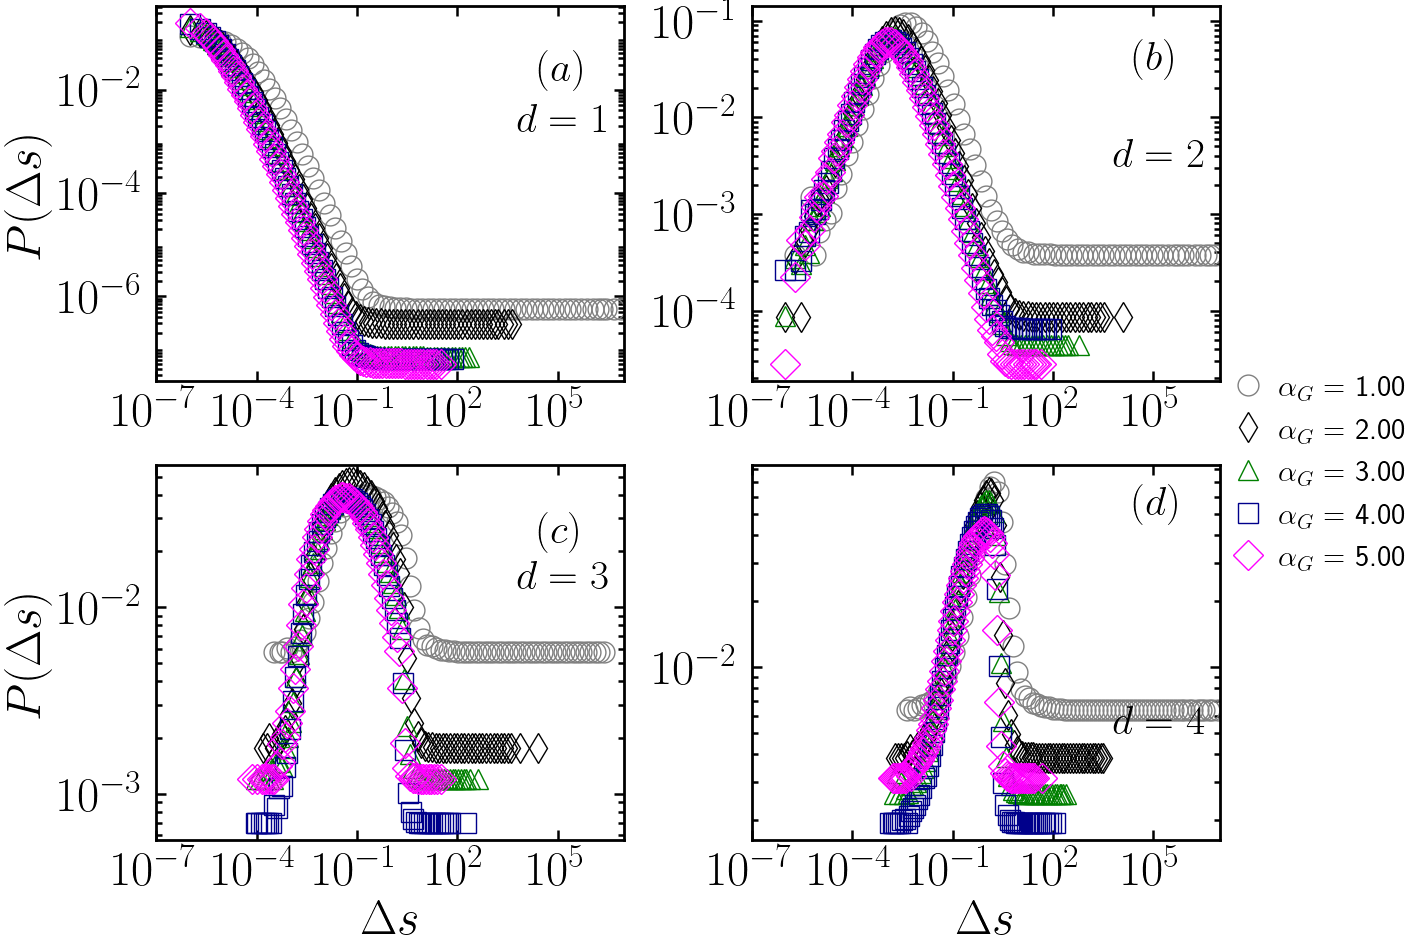

In [42]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod"]
markers = ["o","d","^","s","D", "*"]
#markers = ["o","o","o","o","o"]
labels_global = [rf"$\alpha_G$ = {i:.2f}" for i in alpha_g_v]
markersize = 15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_g_v)):
    kwargs = dict(
        marker=markers[i],
        markersize=markersize,
        linestyle='None',
        markerfacecolor='none',     # vazio por dentro
        markeredgecolor=color[i],   # cor do contorno
        markeredgewidth=1.0
    )
    ax[0,0].plot(k_1d_g[i], pk_1d_g[i], **kwargs)
    ax[0,1].plot(k_2d_g[i], pk_2d_g[i], **kwargs)
    ax[1,0].plot(k_3d_g[i], pk_3d_g[i], **kwargs)
    ax[1,1].plot(k_4d_g[i], pk_4d_g[i], **kwargs)
    
thickness_axes =  2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
proxy_handles = [
    plt.Line2D(
        [], [],
        linestyle='None',
        marker=markers[i],
        markersize=markersize,
        markerfacecolor='none',
        markeredgecolor=color[i],
        markeredgewidth=1.0
    )
    for i in range(len(alpha_g_v))
]
fig.legend(proxy_handles, labels_global,
           loc="center left", bbox_to_anchor=(0.81, 0.5),handletextpad=.001 ,
           fontsize=22, frameon=False)


# for f, d in zip(ax.flatten(), dim):
#     f.set_title(f"$d = {d}$")

ax[0, 0].text(10**4.4, 10**(-1.8), "$(a)$", style="normal" ,fontsize=30)
ax[0, 1].text(10**4.4, 10**(-1.5), "$(b)$", style="normal" ,fontsize=30)
ax[1, 0].text(10**4.4, 10**(-1.65), "$(c)$", style="normal" ,fontsize=30)
ax[1, 1].text(10**4.4, 10**(-1.3), "$(d)$", style="normal" ,fontsize=30)


ax[0, 0].text(10**(3.8), 10**(-2.8), f'$d = 1$', style="normal" ,fontsize=30)
ax[0, 1].text(10**(3.8), 10**(-2.5), f'$d = 2$', style="normal" ,fontsize=30)
ax[1, 0].text(10**(3.8), 10**(-1.9), f'$d = 3$', style="normal" ,fontsize=30)
ax[1, 1].text(10**(3.8), 10**(-2.3), f'$d = 4$', style="normal" ,fontsize=30)

thickness_axes = 2.0

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([10**(-7),10**7])
        #ax[i, j].set_ylim([10**(-7),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(\Delta s)$", fontsize = 35)
        ax[1, j].set_xlabel(r"$\Delta s$", fontsize = 35)
        
        for spine in ax[i, j].spines.values():
            spine.set_linewidth(thickness_axes)
        ax[i, j].xaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        ax[i, j].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=7, width=1.8, colors='black')
        ax[i, j].tick_params(axis='both', which='minor', direction='in', length=4, width=1.8, colors='black')
        ax[i, j].tick_params('both', labelsize=35)
        # Subticks automáticos entre potências de 10
        ax[i, j].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
        ax[i, j].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))

        # Formatação dos ticks como 10⁰, 10¹, ...
        ax[i, j].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
        ax[i, j].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))        

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/distances_alpha_g_N100000.svg", dpi =300)
plt.show()

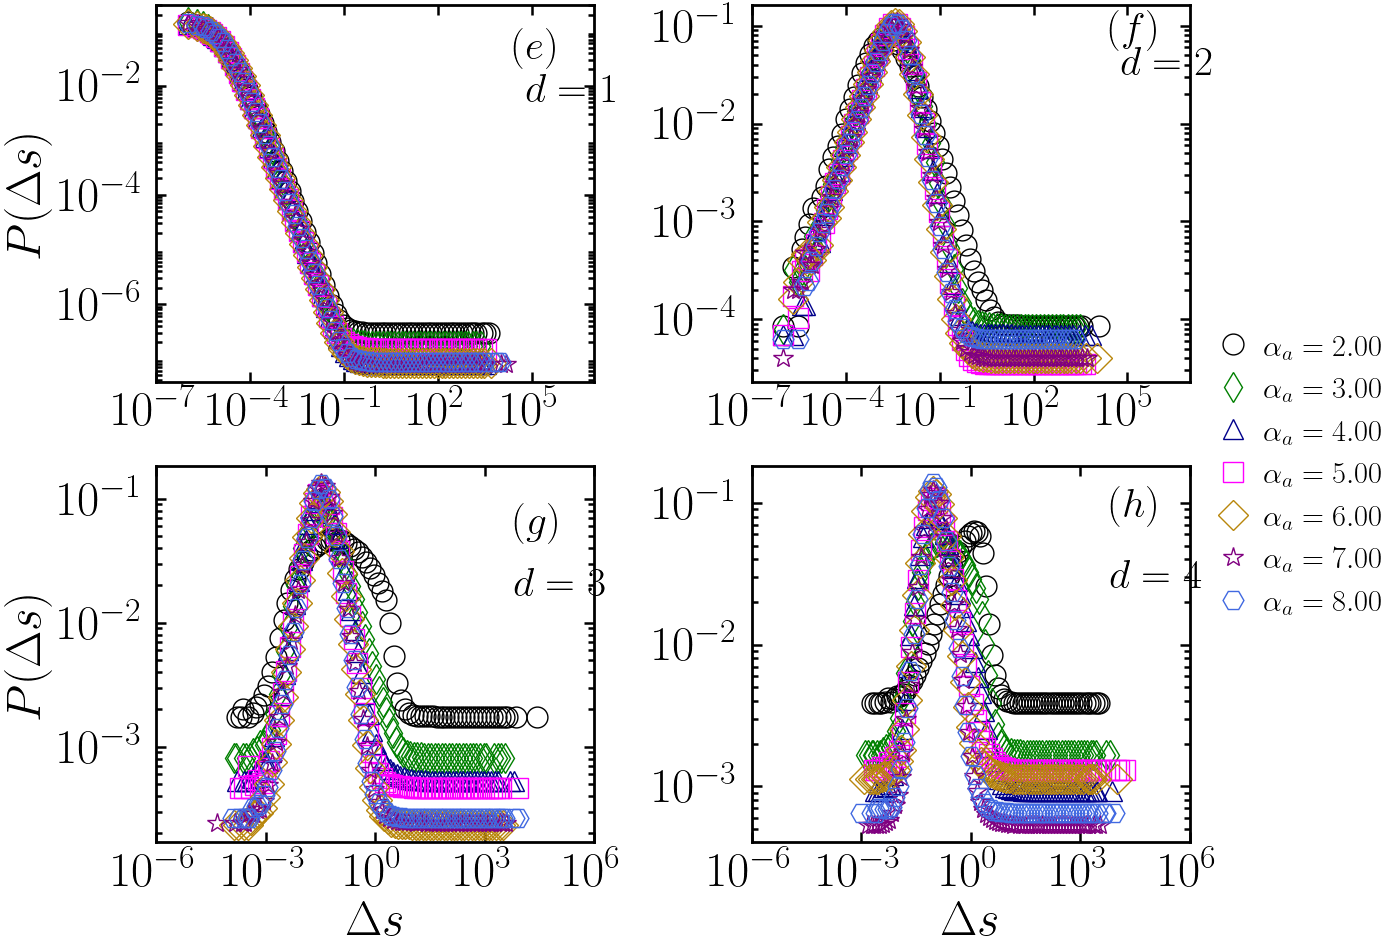

In [43]:
color = ["black",'#008000',"#00008B","magenta","darkgoldenrod","purple","royalblue", "silver"]

markers = ["o","d","^","s","D","*","H","p","P"]
labels_global = [rf"$\alpha_a = {alpha_a_v[i]:.2f}$" for i in range(len(alpha_a_v))]
#markers = ["o","o","o","o","o"]
labels_1 = [rf"$\alpha_A = {alpha_a_v[i]:.2f}$" for i in range(len(alpha_a_v))]
markersize = 15
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_a_v)):
    kwargs = dict(
        marker=markers[i],
        markersize=markersize,
        linestyle='None',
        markerfacecolor='none',     # vazio por dentro
        markeredgecolor=color[i],   # cor do contorno
        markeredgewidth=1.0
    )
    ax[0,0].plot(k_1d_a[i], pk_1d_a[i], **kwargs)
    ax[0,1].plot(k_2d_a[i], pk_2d_a[i], **kwargs)
    ax[1,0].plot(k_3d_a[i], pk_3d_a[i], **kwargs)
    ax[1,1].plot(k_4d_a[i], pk_4d_a[i], **kwargs)


thickness_axes =  2.0
# Criando proxies para a legenda global (α_a)
proxy_handles = [
    plt.Line2D(
        [], [],
        linestyle='None',
        marker=markers[i],
        markersize=markersize,
        markerfacecolor='none',
        markeredgecolor=color[i],
        markeredgewidth=1.0
    )
    for i in range(len(alpha_a_v))
]
fig.legend(proxy_handles, labels_global,
           loc="center left", bbox_to_anchor=(0.80, 0.5), handletextpad=.001,
           fontsize=22, frameon=False)



ax[0, 0].text(10**(4.4), 10**(-1.5), "$(e)$", style="normal" ,fontsize=30)
ax[0, 1].text(10**(4.4), 10**(-1.15), "$(f)$", style="normal" ,fontsize=30)
ax[1, 0].text(10**3.8, 10**(-1.28), "$(g)$", style="normal" ,fontsize=30)
ax[1, 1].text(10**3.8, 10**(-1.10), "$(h)$", style="normal" ,fontsize=30)


ax[0, 0].text(10**4.8, 10**(-2.3), f'$d = 1$', style="normal" ,fontsize=30)
ax[0, 1].text(10**4.8, 10**(-1.50), f'$d = 2$', style="normal" ,fontsize=30)
ax[1, 0].text(10**3.8, 10**(-1.78), f'$d = 3$', style="normal" ,fontsize=30)
ax[1, 1].text(10**3.8, 10**(-1.60), f'$d = 4$', style="normal" ,fontsize=30)
# for f, d in zip(ax.flatten(), dim):
#     f.set_title(f"$d = {d}$", fontsize=18)

parts_of_graphic = ['top', 'bottom', 'left', 'right']
for i in range(2):
    for j in range(2):
        if(i == 0):
            ax[i, j].set_xlim([10**(-7),10**7])
#            ax[i, j].set_ylim([10**(-8),10**0])
        else:
            ax[i, j].set_xlim([10**(-6),10**6])
            
        
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        #ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(\Delta s)$", fontsize=35)
        ax[1, j].set_xlabel(r"$\Delta s$", fontsize=35)

        ax[i, j].tick_params(axis='both', which='major', direction='in', length=7, width=1.8, colors='black')
        ax[i, j].tick_params(axis='both', which='minor', direction='in', length=4, width=1.8, colors='black')
        ax[i, j].tick_params('both', labelsize=35)
        for spine in ax[i, j].spines.values():
            spine.set_linewidth(thickness_axes)
        ax[i, j].xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
        ax[i, j].yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        
        # Subticks automáticos entre potências de 10
        ax[i, j].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))
        ax[i, j].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))

        # Formatação dos ticks como 10⁰, 10¹, ...
        ax[i, j].xaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
        ax[i, j].yaxis.set_major_formatter(LogFormatterSciNotation(base=10.0, labelOnlyBase=True))
        
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("../../results/distributions/distances_alpha_a_N100000.svg", dpi =300)
plt.show()

In [10]:
N = 10**5
dim = [1,2,3,4]
alpha_ag_f = 2.0
alpha_a_v = [i for i in np.arange(2.0, 10, 0.5)]
alpha_g_v = [i for i in np.arange(1.0, 10, 0.5)]
# Generate .npy with all degree values from gml.gz files
bin_count = 80
# for d in dim:
#     for aa in alpha_a_v:
#         # Generate log_binning file to distances and degree
#         print(f"N = {N}, dim = {d}, alpha_a = {aa}, alpha_g = {alpha_ag_f}")
#         dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{aa:.2f}_alpha_g_{alpha_ag_f:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
#         dados_flat = dados.flatten()
#         log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=aa, alpha_g=alpha_ag_f, propertie="distances")

for d in dim:
    for ag in alpha_g_v:
        # Generate log_binning file to distances and degree
        print(f"N = {N}, dim = {d}, alpha_a = {alpha_ag_f}, alpha_g = {ag}")
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{ag:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        log_binning(Counter(dados_flat), bin_count, save=True, N=N, dim=d, alpha_a=alpha_ag_f, alpha_g=ag, propertie="distances")

N = 100000, dim = 1, alpha_a = 1.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_1.00/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 1.5, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_1.50/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 2.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.00/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 2.5, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_2.50/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_3.00/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 3.5, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a_2.00_alpha_g_3.50/distances_distribution_log.csv
N = 100000, dim = 1, alpha_a = 4.0, alpha_g = 2.0
Arquivo salvo em ../../data/N_100000/dim_1/alpha_a

In [21]:
N, d, alpha_ag_f, ag = 10**5, 1, 2.0, 2.0
dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{ag:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
dados_flat = dados.flatten()
int(len(dados_flat)/N)

1047

In [ ]:
N = 10**5
dim = [1,2,3,4]
alpha_ag_f = 2.0
alpha_g_v = [i for i in np.arange(1.0, 10, 0.5)]
alpha_a_v = [i for i in np.arange(2.0, 10, 0.5)]


for d in dim:
    for i in range(len(alpha_g_v)):
        df_ = pd.read_csv(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        N_s = int(len(dados_flat)/N)
        k, pk = df_["ds"], df_["pds"]
    
    for j in range(len(alpha_a_v)):
        df_ = pd.read_csv(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        dados = np.load(f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances.npy")  # Shape (n_arquivos, n_linhas)
        dados_flat = dados.flatten()
        N_s = int(len(dados_flat)/N)
        k, pk = df_["ds"], df_["pds"]
        #df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
        #df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')
        #df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g_v[i]:.2f}/distances_distribution_log.csv", delimiter=' ')

        #k_1d_g[i], pk_1d_g[i] = df_1d["ds"], df_1d["pds"]
        #k_2d_g[i], pk_2d_g[i] = df_2d["ds"], df_2d["pds"]
        #k_3d_g[i], pk_3d_g[i] = df_3d["ds"], df_3d["pds"]
        #k_4d_g[i], pk_4d_g[i] = df_4d["ds"], df_4d["pds"]
for i in range(len(alpha_a_v)):
        df_1d = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_2d = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_3d = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')
        df_4d = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]:.2f}_alpha_g_{alpha_ag_f:.2f}/distances_distribution_log.csv", delimiter=' ')

        k_1d_a[i], pk_1d_a[i] = df_1d["ds"], df_1d["pds"]
        k_2d_a[i], pk_2d_a[i] = df_2d["ds"], df_2d["pds"]
        k_3d_a[i], pk_3d_a[i] = df_3d["ds"], df_3d["pds"]
        k_4d_a[i], pk_4d_a[i] = df_4d["ds"], df_4d["pds"]

In [36]:
import numpy as np
import pandas as pd
import json
import os

N = 10**5
dim = [1, 2, 3, 4]
alpha_ag_f = 2.0
alpha_g_v = np.arange(1.0, 10, 0.5)
alpha_a_v = np.arange(2.0, 10, 0.5)


def distances_distribution(N, dim, alpha_a_v, alpha_g_v):
    alpha_ag_f = 2.0
    data = []
    
    for d in dim:
        # Loop variando alpha_g
        for alpha_g in alpha_g_v:
            folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g:.2f}"
            try:
                df = pd.read_csv(os.path.join(folder, "distances_distribution_log.csv"), delimiter=' ')
                dados = np.load(os.path.join(folder, "distances.npy"))
            except Exception as e:
                print(f"Erro ao ler {folder}: {e}")
                continue

            N_s = int(dados.size / N)

            entry = {
                "N": N,
                "alpha_A": format(alpha_ag_f, '.2f'),
                "alpha_G": format(alpha_g, '.2f'),
                "dim": d,
                "N_s": N_s,
                "k": df["ds"].tolist(),
                "Pk": df["pds"].tolist()
            }
            data.append(entry)

        # Loop variando alpha_a
        for alpha_a in alpha_a_v:
            folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_ag_f:.2f}"
            try:
                df = pd.read_csv(os.path.join(folder, "distances_distribution_log.csv"), delimiter=' ')
                dados = np.load(os.path.join(folder, "distances.npy"))
            except Exception as e:
                print(f"Erro ao ler {folder}: {e}")
                continue

            N_s = int(dados.size / N)

            entry = {
                "N": N,
                "alpha_A": format(alpha_a,'.2f'),
                "alpha_G": format(alpha_ag_f,'.2f'),
                "dim": d,
                "N_s": N_s,
                "k": df["ds"].tolist(),
                "Pk": df["pds"].tolist()
            }
            data.append(entry)

    # Salvar como JSON
    with open('../../data/distances_distributions.json', 'w') as f:
        json.dump(data, f, indent=4)

    print("Arquivo salvo como 'distances_distributions.json'")
distances_distribution(N, dim, alpha_a_v, alpha_g_v)

Arquivo salvo como 'distances_distributions.json'


In [ ]:
import numpy as np
import pandas as pd
import json
import os


def generate_distributions(N, dim, alpha_a_v, alpha_g_v):
    alpha_ag_f = 2.0

    # Dicionários para armazenar dados separados
    data_distance = []
    data_degree = []

    types = [
        {
            "name": "distance",
            "csv_name": "distances_distribution_log.csv",
            "npy_name": "distances.npy",
            "csv_columns": ["ds", "pds"],
            "data_list": data_distance,
            "output_path": '../../data/distances_distributions.json'
        },
        {
            "name": "degree",
            "csv_name": "filenames_degree.csv",
            "npy_name": "degree.npy",
            "csv_columns": ["k", "pk"],
            "data_list": data_degree,
            "output_path": '../../data/degree_distributions.json'
        }
    ]

    for d in dim:
        for t in types:
            # Loop variando alpha_g
            for alpha_g in alpha_g_v:
                folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_ag_f:.2f}_alpha_g_{alpha_g:.2f}"
                try:
                    df = pd.read_csv(os.path.join(folder, t["csv_name"]), delimiter=' ')
                    dados = np.load(os.path.join(folder, t["npy_name"]))
                except Exception as e:
                    print(f"Erro ao ler {folder} ({t['name']}): {e}")
                    continue

                N_s = int(dados.size / N)

                entry = {
                    "N": N,
                    "alpha_A": round(alpha_ag_f, 2),
                    "alpha_G": round(alpha_g, 2),
                    "dim": d,
                    "N_s": N_s,
                    "k": df[t["csv_columns"][0]].tolist(),
                    "Pk": df[t["csv_columns"][1]].tolist()
                }
                t["data_list"].append(entry)

            # Loop variando alpha_a
            for alpha_a in alpha_a_v:
                folder = f"../../data/N_{N}/dim_{d}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_ag_f:.2f}"
                try:
                    df = pd.read_csv(os.path.join(folder, t["csv_name"]), delimiter=' ')
                    dados = np.load(os.path.join(folder, t["npy_name"]))
                except Exception as e:
                    print(f"Erro ao ler {folder} ({t['name']}): {e}")
                    continue

                N_s = int(dados.size / N)

                entry = {
                    "N": N,
                    "alpha_A": round(alpha_a, 2),
                    "alpha_G": round(alpha_ag_f, 2),
                    "dim": d,
                    "N_s": N_s,
                    "k": df[t["csv_columns"][0]].tolist(),
                    "Pk": df[t["csv_columns"][1]].tolist()
                }
                t["data_list"].append(entry)

    # Salvar os arquivos separados
    for t in types:
        with open(t["output_path"], 'w') as f:
            json.dump(t["data_list"], f, indent=4)
        print(f"Arquivo '{t['output_path']}' salvo com sucesso.")

N = 10**5
dim = [1, 2, 3, 4]
alpha_ag_f = 2.0
alpha_g_v = np.arange(1.0, 10, 0.5)
alpha_a_v = np.arange(2.0, 10, 0.5)
generate_distributions(N, dim, alpha_a_v, alpha_g_v)

KeyError: 'k'

In [12]:
min_k_2d_ag, min_pk_2d_ag = [], []
min_k_3d_ag, min_pk_3d_ag = [], []
min_k_4d_ag, min_pk_4d_ag = [], []

df_k_max_alpha_g = {"alpha_g":[], "k_2d":[],"k_3d":[], "k_3d":[]}
df_pk_max_alpha_g = {"alpha_g":[],"pk_2d":[],"pk_3d":[], "pk_3d":[]}

dimensions = [1,2,3,4]

for i in range(len(alpha_g_v)):
    k_2d_ag, pk_2d_ag = k_2d_g[i], pk_2d_g[i]
    k_3d_ag, pk_3d_ag = k_3d_g[i], pk_3d_g[i]
    k_4d_ag, pk_4d_ag = k_4d_g[i], pk_4d_g[i]
    
    k_min_2d_ag = [k_2d_ag[idx] for idx, ele in enumerate(zip(k_2d_ag, pk_2d_ag)) if ele[1] == max(pk_2d_ag)][0]
    k_min_3d_ag = [k_3d_ag[idx] for idx, ele in enumerate(zip(k_3d_ag, pk_3d_ag)) if ele[1] == max(pk_3d_ag)][0]
    k_min_4d_ag = [k_4d_ag[idx] for idx, ele in enumerate(zip(k_4d_ag, pk_4d_ag)) if ele[1] == max(pk_4d_ag)][0]
    
    min_k_2d_ag.append(k_min_2d_ag)
    min_pk_2d_ag.append(max(pk_2d_ag))

    min_k_3d_ag.append(k_min_3d_ag)
    min_pk_3d_ag.append(max(pk_3d_ag))

    min_k_4d_ag.append(k_min_4d_ag)
    min_pk_4d_ag.append(max(pk_4d_ag))

df_k_max_alpha_g["alpha_g"] = alpha_g_v
df_k_max_alpha_g["k_2d"] = min_k_2d_ag
df_k_max_alpha_g["k_3d"] = min_k_3d_ag
df_k_max_alpha_g["k_4d"] = min_k_4d_ag

df_pk_max_alpha_g["alpha_g"] = alpha_g_v
df_pk_max_alpha_g["pk_2d"] = min_pk_2d_ag
df_pk_max_alpha_g["pk_3d"] = min_pk_3d_ag
df_pk_max_alpha_g["pk_4d"] = min_pk_4d_ag

In [13]:
min_k_2d_aa, min_pk_2d_aa = [], []
min_k_3d_aa, min_pk_3d_aa = [], []
min_k_4d_aa, min_pk_4d_aa = [], []

df_k_max_alpha_a = {"alpha_a":[], "k_2d":[],"k_3d":[], "k_3d":[]}
df_pk_max_alpha_a = {"alpha_a":[],"pk_2d":[],"pk_3d":[], "pk_3d":[]}

dimensions = [1,2,3,4]

for i in range(len(alpha_a_v)):
    k_2d_aa, pk_2d_aa = k_2d_a[i], pk_2d_a[i]
    k_3d_aa, pk_3d_aa = k_3d_a[i], pk_3d_a[i]
    k_4d_aa, pk_4d_aa = k_4d_a[i], pk_4d_a[i]
    
    k_min_2d_aa = [k_2d_aa[idx] for idx, ele in enumerate(zip(k_2d_aa, pk_2d_aa)) if ele[1] == max(pk_2d_aa)][0]
    k_min_3d_aa = [k_3d_aa[idx] for idx, ele in enumerate(zip(k_3d_aa, pk_3d_aa)) if ele[1] == max(pk_3d_aa)][0]
    k_min_4d_aa = [k_4d_aa[idx] for idx, ele in enumerate(zip(k_4d_aa, pk_4d_aa)) if ele[1] == max(pk_4d_aa)][0]
    
    min_k_2d_aa.append(k_min_2d_aa)
    min_pk_2d_aa.append(max(pk_2d_aa))

    min_k_3d_aa.append(k_min_3d_aa)
    min_pk_3d_aa.append(max(pk_3d_aa))

    min_k_4d_aa.append(k_min_4d_aa)
    min_pk_4d_aa.append(max(pk_4d_aa))

df_k_max_alpha_a["alpha_a"] = alpha_a_v
df_k_max_alpha_a["k_2d"] = min_k_2d_aa
df_k_max_alpha_a["k_3d"] = min_k_3d_aa
df_k_max_alpha_a["k_4d"] = min_k_4d_aa

df_pk_max_alpha_a["alpha_a"] = alpha_a_v
df_pk_max_alpha_a["pk_2d"] = min_pk_2d_aa
df_pk_max_alpha_a["pk_3d"] = min_pk_3d_aa
df_pk_max_alpha_a["pk_4d"] = min_pk_4d_aa

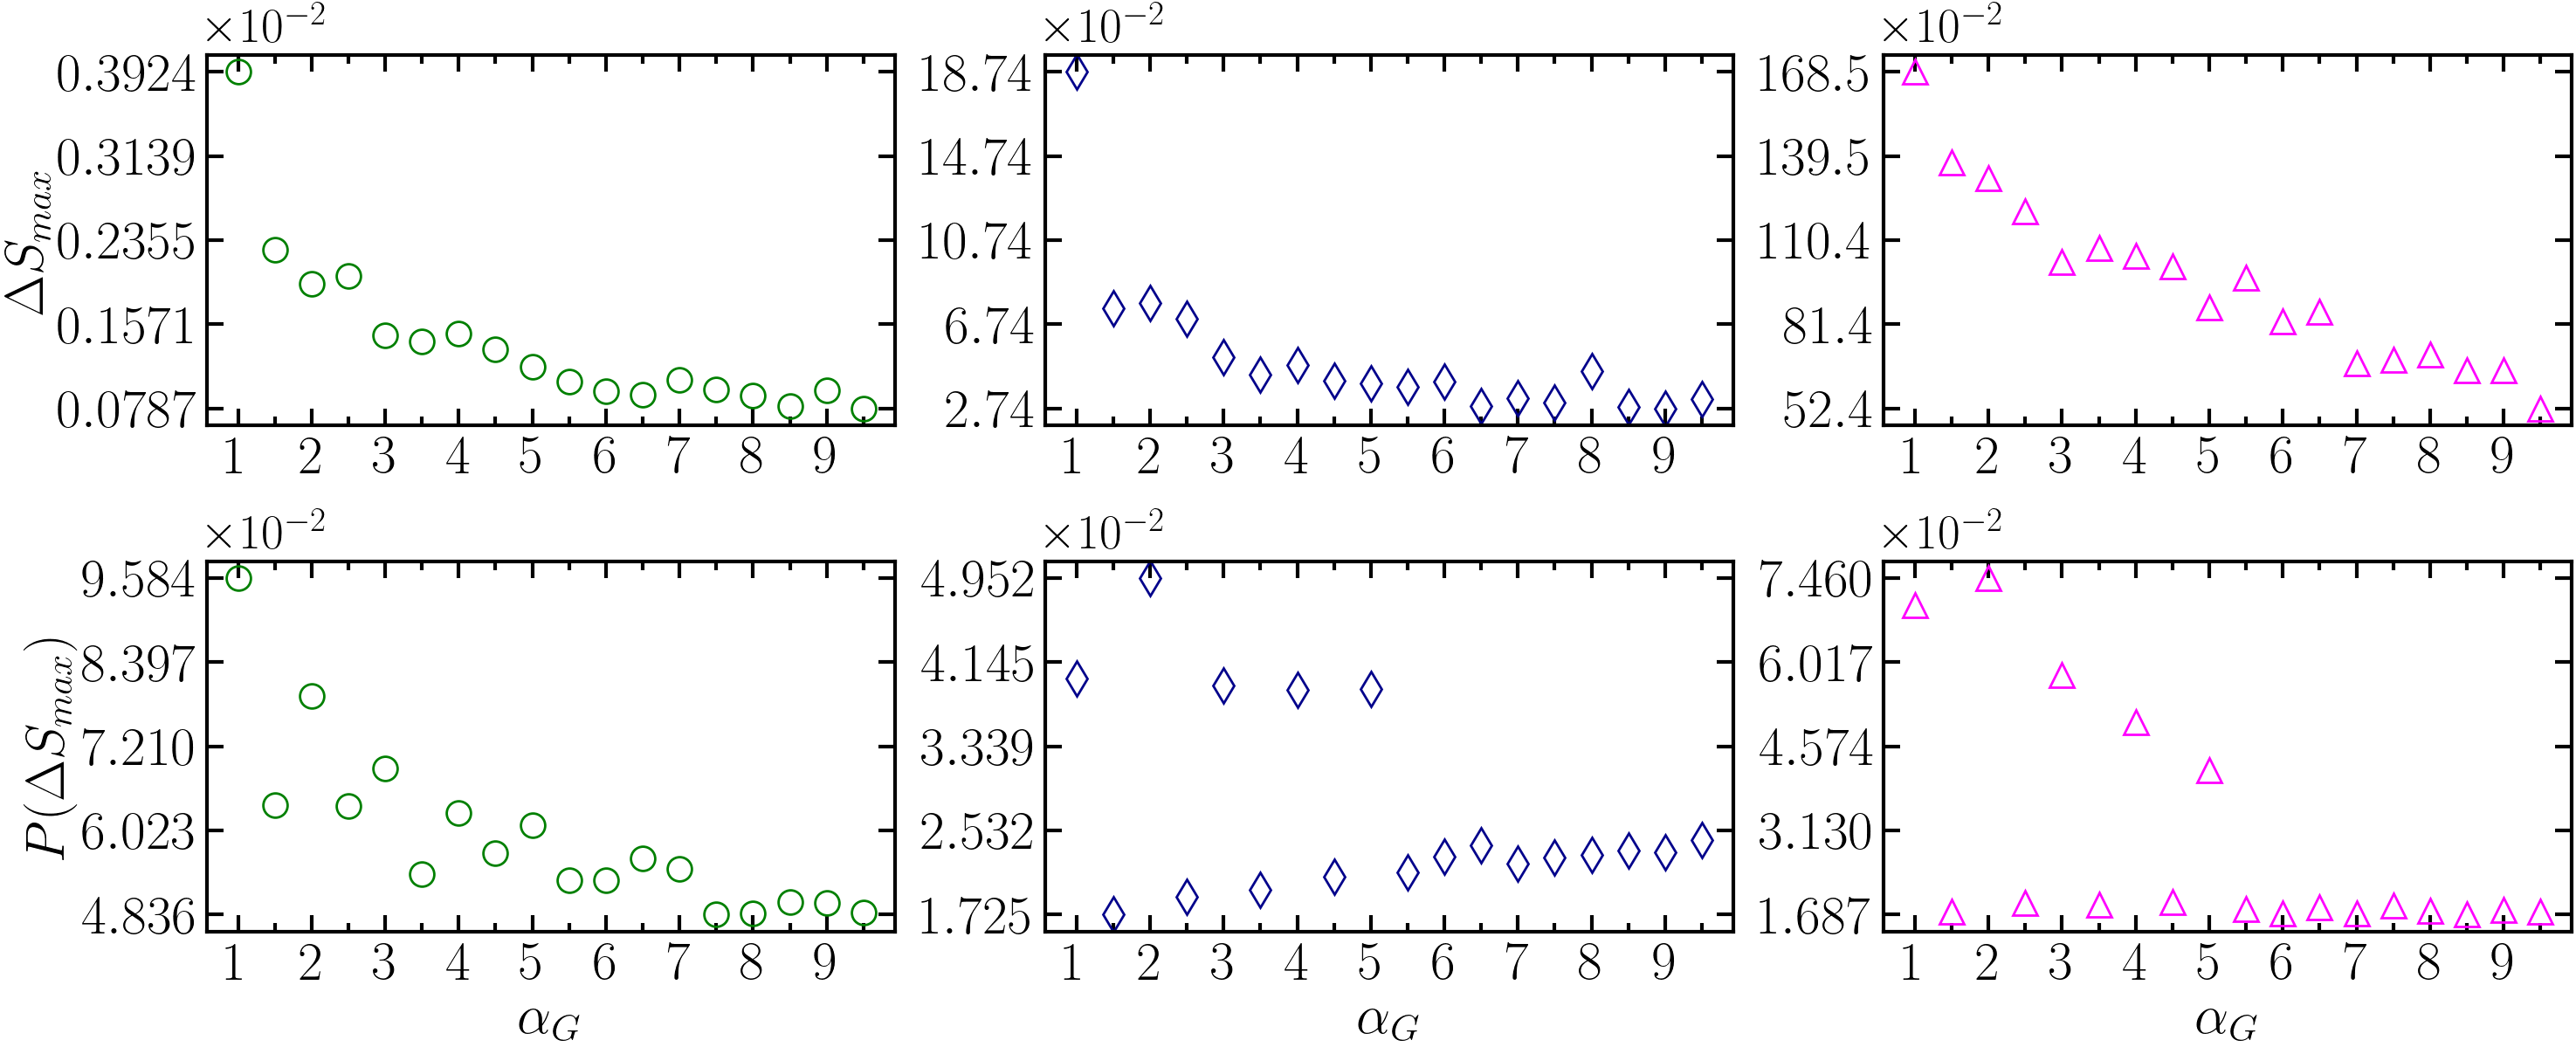

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, ScalarFormatter

dimensions = [2, 3, 4]

# Parâmetros de estilo
markersize = 20
fonts_size = 45
thickness_axes = 3.0
mew = 2.0
color = ['#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D"]

# Fator de escala para o eixo y
scale_factor = 1e2
scale_label = r"$\times 10^{-2}$"

# Criação dos subplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12.5))  # 2 linhas, 3 colunas

# Linha superior: ΔS_max vs α_A
for i, d in enumerate(dimensions):
    ax = axs[0, i]
    x_data = np.array(df_k_max_alpha_g["alpha_g"])
    y_data = np.array(df_k_max_alpha_g[f"k_{d}d"]) * scale_factor

    ax.plot(x_data, y_data,
            markers[i], color=color[i], markerfacecolor='None',
            markersize=markersize, mew=mew)

    #ax.set_xlabel(r"$\alpha_G$", fontsize=fonts_size)
    if i == 0:
        ax.set_ylabel(r"$\Delta S_{max}$", fontsize=fonts_size)

    y_min, y_max = y_data.min(), y_data.max()
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.annotate(scale_label, xy=(0.0, 1.02), xycoords='axes fraction',
                fontsize=fonts_size * 0.9, ha='left', va='bottom')

    ax.tick_params(axis='both', which='major', direction='in', length=14,
                   width=thickness_axes, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=7,
                   width=thickness_axes, colors='black')
    ax.tick_params('both', labelsize=fonts_size)
    ax.yaxis.offsetText.set_fontsize(fonts_size)

    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Linha inferior: P(ΔS_max) vs α_G
for i, d in enumerate(dimensions):
    ax = axs[1, i]
    x_data = np.array(df_pk_max_alpha_g["alpha_g"])
    y_data = np.array(df_pk_max_alpha_g[f"pk_{d}d"]) * scale_factor

    ax.plot(x_data, y_data,
            markers[i], color=color[i], markerfacecolor='None',
            markersize=markersize, mew=mew)

    ax.set_xlabel(r"$\alpha_G$", fontsize=fonts_size)
    if i == 0:
        ax.set_ylabel(r"$P (\Delta S_{max})$", fontsize=fonts_size)

    y_min, y_max = y_data.min(), y_data.max()
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.annotate(scale_label, xy=(0.0, 1.02), xycoords='axes fraction',
                fontsize=fonts_size * 0.9, ha='left', va='bottom')

    ax.tick_params(axis='both', which='major', direction='in', length=14,
                   width=thickness_axes, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=7,
                   width=thickness_axes, colors='black')
    ax.tick_params('both', labelsize=fonts_size)
    ax.yaxis.offsetText.set_fontsize(fonts_size)

    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Ajuste de layout e salvamento
plt.tight_layout()
plt.savefig("../../results/distributions/max_prob_dist_alpha_g.png", dpi=300)
plt.show()


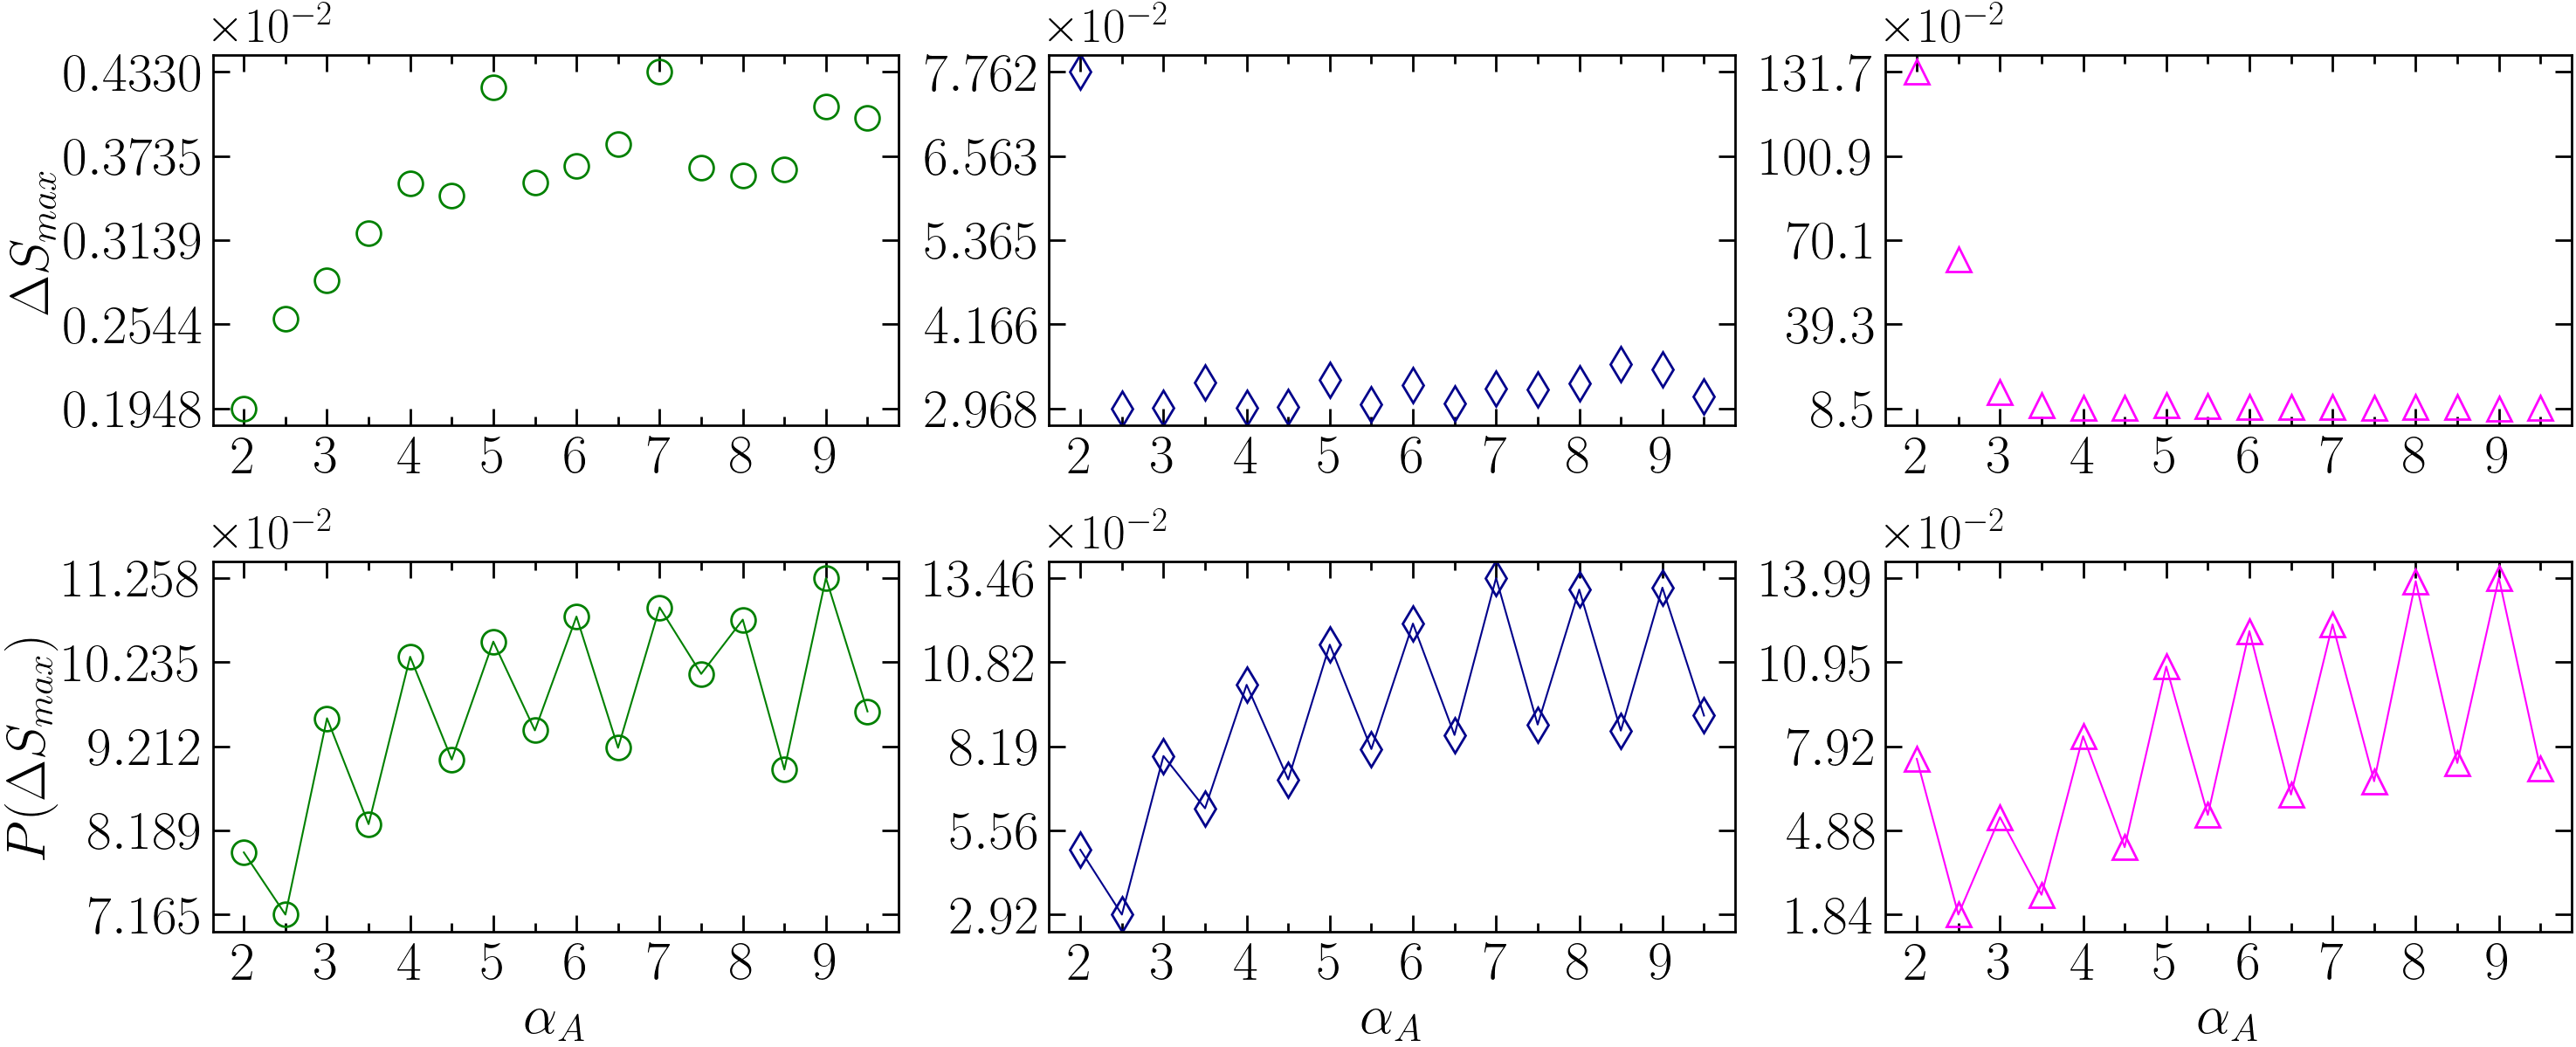

In [9]:
dimensions = [2, 3, 4]

# Parâmetros de estilo
markersize = 20
fonts_size = 45
thickness_axes = 2.0
mew = 2.0
color = ['#008000', "#00008B", "magenta", "darkgoldenrod"]
markers = ["o", "d", "^", "s", "D"]

# Fator de escala
scale_factor = 1e2
scale_label = r"$\times 10^{-2}$"

# Criação dos subplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12.5))  # 2 linhas, 3 colunas

# Linha superior: ΔS_max vs α_A
for i, d in enumerate(dimensions):
    ax = axs[0, i]
    x_data = np.array(df_k_max_alpha_a["alpha_a"])
    y_data = np.array(df_k_max_alpha_a[f"k_{d}d"]) * scale_factor

    ax.plot(x_data, y_data,
            markers[i], color=color[i], markerfacecolor='None',
            markersize=markersize, mew=mew)

    #ax.set_xlabel(r"$\alpha_A$", fontsize=fonts_size)
    if i == 0:
        ax.set_ylabel(r"$\Delta S_{max}$", fontsize=fonts_size)

    y_min, y_max = y_data.min(), y_data.max()
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.annotate(scale_label, xy=(0.0, 1.02), xycoords='axes fraction',
                fontsize=fonts_size * 0.9, ha='left', va='bottom')
    ax.yaxis.offsetText.set_fontsize(fonts_size)

    ax.tick_params(width=thickness_axes, length=10, labelsize=fonts_size)
    ax.tick_params(axis='both', which='major', direction='in', length=14,
                   width=thickness_axes, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=7,
                   width=thickness_axes, colors='black')
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Linha inferior: P(ΔS_max) vs α_A
for i, d in enumerate(dimensions):
    ax = axs[1, i]
    x_data = np.array(df_pk_max_alpha_a["alpha_a"])
    y_data = np.array(df_pk_max_alpha_a[f"pk_{d}d"]) * scale_factor

    ax.plot(x_data, y_data,
            markers[i], color=color[i], markerfacecolor='None',
            markersize=markersize, linestyle='-' ,mew=mew)

    ax.set_xlabel(r"$\alpha_A$", fontsize=fonts_size)
    if i == 0:
        ax.set_ylabel(r"$P (\Delta S_{max})$", fontsize=fonts_size)

    y_min, y_max = y_data.min(), y_data.max()
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.annotate(scale_label, xy=(0.0, 1.02), xycoords='axes fraction',
                fontsize=fonts_size * 0.9, ha='left', va='bottom')
    ax.yaxis.offsetText.set_fontsize(fonts_size)

    ax.tick_params(width=thickness_axes, length=10, labelsize=fonts_size)
    ax.tick_params(axis='both', which='major', direction='in', length=14,
                   width=thickness_axes, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=7,
                   width=thickness_axes, colors='black')
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Ajuste de layout e salvamento
plt.tight_layout()
plt.savefig("../../results/distributions/max_prob_dist_alpha_a.png", dpi=300)
plt.show()